In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [122]:
allset = pd.read_csv("diabetes.csv")
train = allset[:600]
test = allset[600:].drop(columns=["Outcome"]) 
answer = allset['Outcome'][600:]
answer

600    0
601    0
602    0
603    1
604    1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 168, dtype: int64

In [123]:
trainLen = len(train)
trainLen

600

<Axes: >

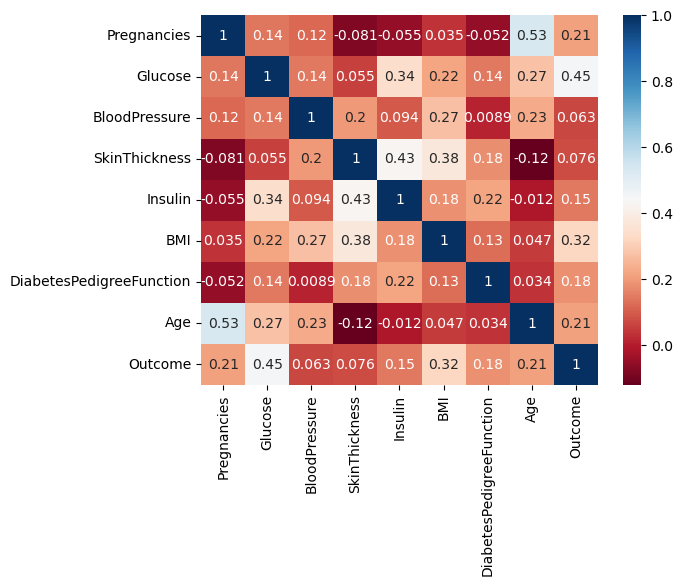

In [124]:
train_corr = train.corr()
sns.heatmap(train_corr,cmap="RdBu", annot=True)
# 혈압과 피부두께를 제외하면 일정부분 상관관계가 관측되었다.

In [125]:
total = train.append(test)
total

C:\Users\user\AppData\Local\Temp\ipykernel_11964\1454453516.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = train.append(test)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1.0
1,1,85,66,29,0,26.6,0.351,31,0.0
2,8,183,64,0,0,23.3,0.672,32,1.0
3,1,89,66,23,94,28.1,0.167,21,0.0
4,0,137,40,35,168,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NaN
764,2,122,70,27,0,36.8,0.340,27,NaN
765,5,121,72,23,112,26.2,0.245,30,NaN
766,1,126,60,0,0,30.1,0.349,47,NaN


In [143]:
total=total[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction','Age','Outcome']]
total

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1.0
1,1,85,26.6,31,0.0
2,8,183,23.3,32,1.0
3,1,89,28.1,21,0.0
4,0,137,43.1,33,1.0
...,...,...,...,...,...
763,10,101,32.9,63,NaN
764,2,122,36.8,27,NaN
765,5,121,26.2,30,NaN
766,1,126,30.1,47,NaN


In [144]:
train = total[:trainLen]
train

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1.0
1,1,85,26.6,31,0.0
2,8,183,23.3,32,1.0
3,1,89,28.1,21,0.0
4,0,137,43.1,33,1.0
...,...,...,...,...,...
595,0,188,32.0,22,1.0
596,0,67,45.3,46,0.0
597,1,89,27.8,21,0.0
598,1,173,36.8,38,1.0


In [145]:
xtrain = train.drop(columns=['Outcome']) # 이게 훈련 데이터셋이다.
xtrain

,Pregnancies,Glucose,BMI,Age
0,6,148,33.6,50
1,1,85,26.6,31
2,8,183,23.3,32
3,1,89,28.1,21
4,0,137,43.1,33
...,...,...,...,...
595,0,188,32.0,22
596,0,67,45.3,46
597,1,89,27.8,21
598,1,173,36.8,38


In [146]:
ytrain = train['Outcome']
ytrain

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
595    1.0
596    0.0
597    0.0
598    1.0
599    0.0
Name: Outcome, Length: 600, dtype: float64

In [147]:
xtest = total[trainLen:].drop(columns=['Outcome'])
xtest

,Pregnancies,Glucose,BMI,Age
600,1,108,27.1,24
601,6,96,23.7,28
602,1,124,27.8,30
603,7,150,35.2,54
604,4,183,28.4,36
...,...,...,...,...
763,10,101,32.9,63
764,2,122,36.8,27
765,5,121,26.2,30
766,1,126,30.1,47


In [148]:
scaler = StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [149]:
xtrain = scaler.transform(xtrain)
xtrain

array([[ 0.64896283,  0.85394206,  0.21175498,  1.41559569],
       [-0.83948403, -1.0767362 , -0.66292137, -0.19287544],
       [ 1.24434157,  1.92654109, -1.07526879, -0.10821907],
       ...,
       [-0.83948403, -0.95415345, -0.51297685, -1.0394392 ],
       [-0.83948403,  1.62008422,  0.61160703,  0.39971919],
       [-0.83948403, -0.34123972, -1.10025955, -0.61615732]])

In [150]:
xtest = scaler.transform(xtest)
xtest

array([[-0.83948403, -0.37188541, -0.60044449, -0.78547007],
       [ 0.64896283, -0.73963365, -1.02528729, -0.44684457],
       [-0.83948403,  0.11844558, -0.51297685, -0.27753182],
       [ 0.9466522 ,  0.91523343,  0.411681  ,  1.7542212 ],
       [ 0.05358409,  1.92654109, -0.4380046 ,  0.23040644],
       [-0.83948403,  0.11844558,  0.48665326, -1.0394392 ],
       [-0.83948403,  1.86524971,  1.01145907, -0.95478282],
       [-0.83948403, -0.86221639, -1.5500931 , -0.7008137 ],
       [-1.1371734 ,  0.9765248 ,  1.19888972, -0.53150094],
       [-0.83948403, -0.27994835, -0.98780116, -0.87012645],
       [-0.24410528, -0.43317678, -0.12562018, -0.78547007],
       [-0.24410528,  1.65072991,  0.12428734,  0.23040644],
       [ 0.9466522 ,  1.46685579,  0.7865423 ,  0.56903194],
       [ 0.64896283, -0.46382247,  0.07430584, -0.61615732],
       [ 2.13740969,  0.54748519,  0.52413939,  1.41559569],
       [-0.24410528, -0.43317678, -0.76288438, -0.53150094],
       [ 0.64896283, -0.

In [157]:
clf = KNeighborsClassifier()

In [158]:
params ={'n_neighbors':[10,11,12,13,14,15,16,17,18,19]} 

In [159]:
gs=GridSearchCV(clf, param_grid=params , cv= 5, scoring='roc_auc')

In [160]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                         19]},
             scoring='roc_auc')

In [161]:
print(gs.best_score_)
print(gs.best_estimator_)

0.825273613217423
KNeighborsClassifier(n_neighbors=14)


In [162]:
pred = gs.predict(xtest)
pred

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.])

In [163]:
answer

600    0
601    0
602    0
603    1
604    1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 168, dtype: int64

In [164]:
from sklearn.metrics import accuracy_score

In [165]:
accuracy_score(answer,pred)

0.7797619047619048

In [121]:
# -------------------------2번문제------------------------------------------------------------------
# 2) 암 분류기
# - 구글 UCI EDU DATASET > Datasets > UCI Machine Learning Repository
# - 전체 569건의 데이터 중 다음의 기준으로 분류
# - train : 1번~400번까지
# - test : 401번~569번까지